In [1]:
# 1.) Import the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
sns.set(color_codes=True)
import pandas as pd
%matplotlib inline

In [2]:
# 2.) Read the data as a data frame

insurance = pd.read_csv('C:\Project 1 - Applied Statistics\insurance.csv')

In [3]:
# 3.a) Shape of the data
#
# insurance dataset has 7 columns & 1338 records (rows)

display(insurance.shape)
insurance.head()

(1338, 7)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [84]:
# 3.b) Data type of each attribute
#
# Out of 7 columns : 
# Age, BMI, Charges are numeric / quantative columns
# Sex, Children, Smoker, Region are object / categorical / qualitative columns
# Since Children is listed as float64 coversion is needed to Object / categorical datatype

insurance.info()
insurance['children'] = insurance['children'].astype('object')
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null object
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.2+ KB


In [4]:
# 3.c) Checking the presence of missing/NaN values in insurance dataset
#
# NO NaN/ NULL values exists in insurance dataset. Hence no cleanup is required.

display(insurance.isnull().any())
display(insurance.isnull().sum())

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# 3.d) 5 point summary of numerical attributes
#
# Age : Looks like Normal Distribution
# Bmi : Max & Mean values doesnt have many points
# Charges : Min (1121.87) & Max.(63770) and 3rd quatile~Max range (16639.91 ~ 63770.42) have huge difference. 

insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


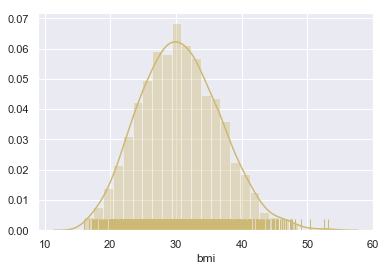

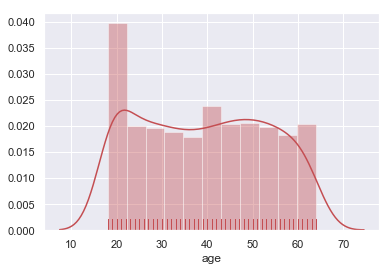

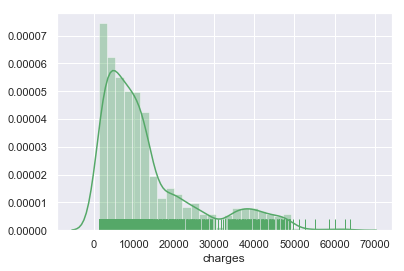

In [88]:
# 3.e) Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
#
# BMI : More or less Normal Distribution is visible with few outliers
# AGE : Data is skewed. 2 peak curve is formed. No outliers found.
# Charges : Data is highly skewed. Count of outliers cannot be ignored.

sns.distplot(insurance.bmi,color="y",rug=True)
plt.show()
sns.distplot(insurance.age,color="r",rug=True)
plt.show()
sns.distplot(insurance.charges,color="g",rug=True)
plt.show()

0.2840471105987448

0.05567251565299186

1.5158796580240388

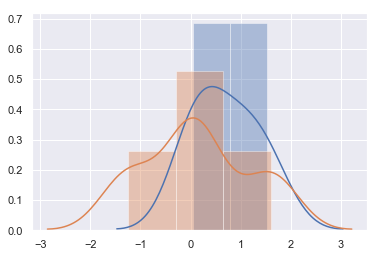

In [89]:
# 3.f) Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
#
# BMI skewness is 0.284 : Moderatly skewed
# AGE skewness is 0.055 : Low Moderatly skewed
# CHARGES skewness is 1.51 : Highly skewed

display(insurance.bmi.skew())
display(insurance.age.skew())
display(insurance.charges.skew())

sns.distplot(insurance.skew(axis=0))
sns.distplot(insurance.kurt(axis=0))
plt.show()

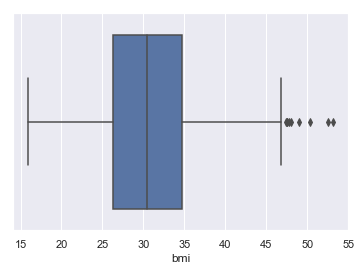

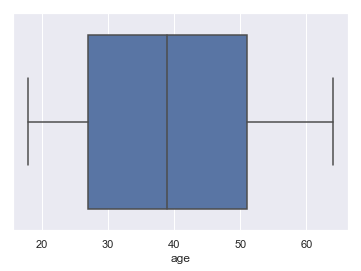

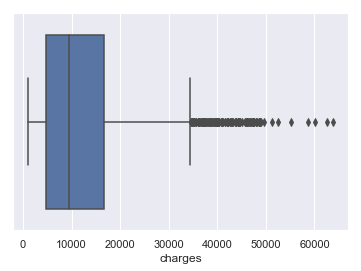

In [6]:
# 3.g) Checking the presence of outliers in ‘bmi’, ‘age’ and‘charges columns
#
# BMI & CHARGES columns does have outliers
# BMI : 3rd quartile & Max values have many interim values 
# CHARGES : 3rd quartile & Max value difference is huge (16639.912515	63770.42801)
# AGE : seems to be following Normal Distribution. No outliers.

sns.boxplot(insurance.bmi)
plt.show()
sns.boxplot(insurance.age)
plt.show()
sns.boxplot(insurance.charges)
plt.show()

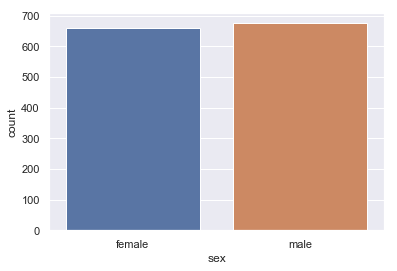

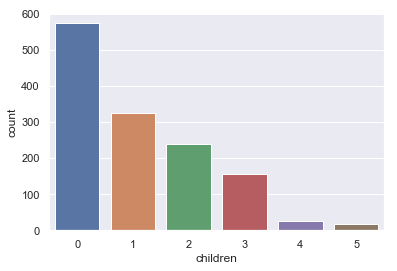

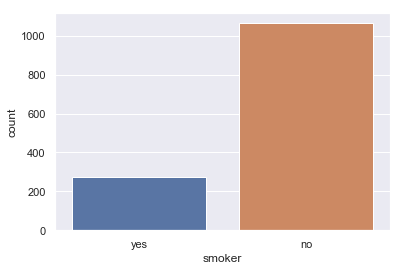

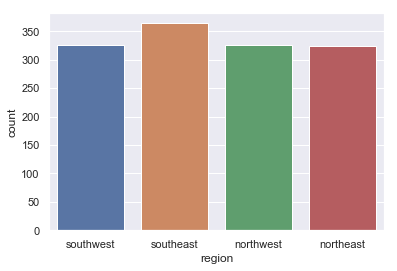

In [91]:
# 3.h) Distribution of categorical columns (include children)
#
# Insurance dataset has 4 categorical columns : Sex, Children, Smoker , Region
# Gender : distribution is balanced. Male & Female count is balanced.
# Children : People with no child dominates the dataset. Majority of the people either have No child or less than 3 
#            children. Very few have 3 or more than 3 children.
# Smoker : Non-smoker count is high. 
# Region : Southeast region has highest participation in the dataset. remaining regions seems to have same volume of data.


sns.countplot(insurance.sex)
plt.show()
sns.countplot(insurance.children)
plt.show()
sns.countplot(insurance.smoker)
plt.show()
sns.countplot(insurance.region)
plt.show()

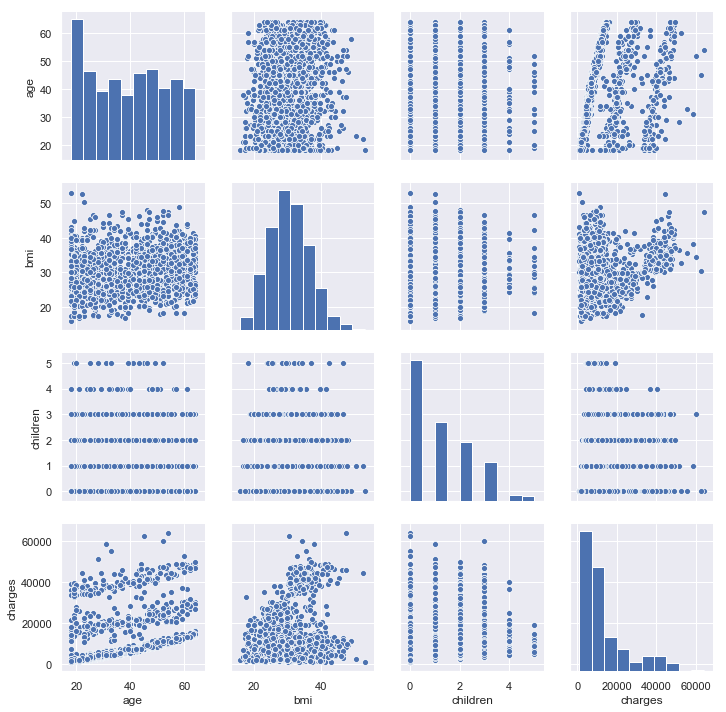

In [14]:
# 3.i) Pair plot that includes all the columns of the data frame
#
# Age Vs Charges : More Age implies more medical cost billed by Health Insurance. upward trend.
# Children Vs Charges : People with 0 child have more medical cost compare to people with 4 & 5 children


sns.pairplot(insurance)

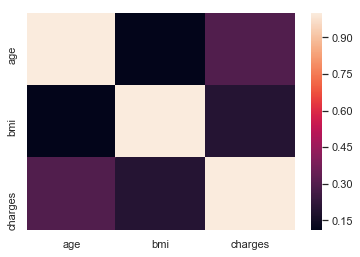

In [92]:
# 3.i) Correlation matrix.  
#
# Looks nice :-)

res1=insurance.corr()
sns.heatmap(res1)

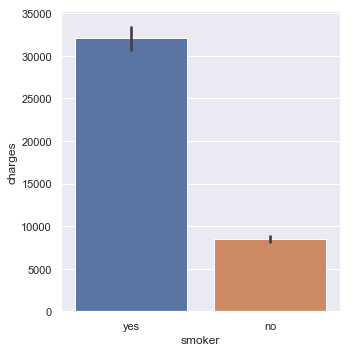

In [37]:
# 4.a) Do charges of people who smoke differ significantly from the people who don't?
#
# Yes. Smokers incurr HIGH medical cost compare to Non-smokers.

sns.catplot(x='smoker',y='charges',data=insurance,kind='bar')


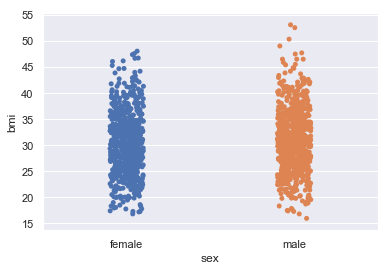

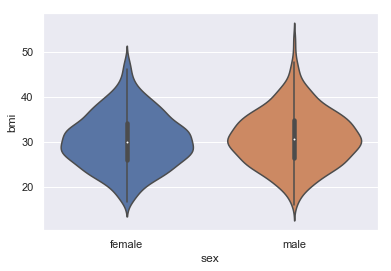

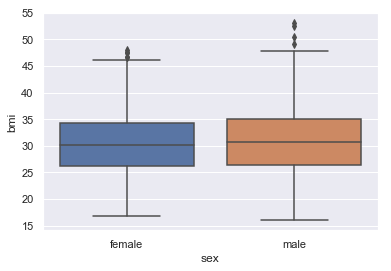

In [47]:
# 4.b) Does bmi of males differ significantly from that of females?
#
# Except for 3-4 points/outliers there is not much significanctly BMI difference between Males & females. Mean is also 
# same.

sns.stripplot(x='sex',y='bmi',data=insurance)
plt.show()
sns.violinplot(x='sex',y='bmi',data=insurance)
plt.show()
sns.boxplot(x='sex',y='bmi',data=insurance)
plt.show()

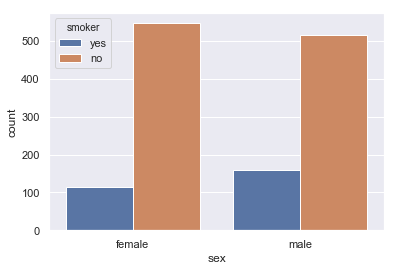

In [50]:
# 4.c) Is the proportion of smokers significantly different in different genders?
#
# Male smokers are in high proportion compare to Female smokers.
# Female non-smokers are more than Male non-smokers

sns.countplot(insurance.sex,hue=insurance.smoker)

(566, 7)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510


[0, 1, 2]
Categories (3, int64): [0, 1, 2]

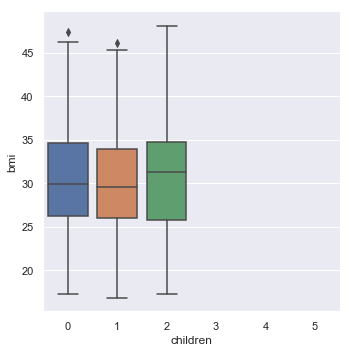

In [70]:
# 4.d) Is the distribution of bmi across women with no children, one child and two children, the same ?
#
# INS_WOMEN dataset will have filtered data from Insurance dataset where children=0,1,2 & sex=='female'
# Women with children =2 has more Mean & Max BMIs 
# Women with children <=1 has low Mean (bmi <=30) & few outliers as well

ins_women = insurance[(insurance.sex=='female') & (insurance['children'].isin([0,1,2]))].copy()
display(ins_women.shape)
display(ins_women.head())
display(ins_women.children.unique())
sns.catplot(x='children',y='bmi',data=ins_women,kind='box')
plt.show()